# Polymorphism

## 1. Definition:

We've learned that Java objects can be polymorphic (or exist in different forms). 

For example, we have seen an object can have multiple types, interface type, original class type, its super-class type, etc.


- In previous lessons before inheritance and interface, we usually see the declaration variable type is the same as the instantiated object type
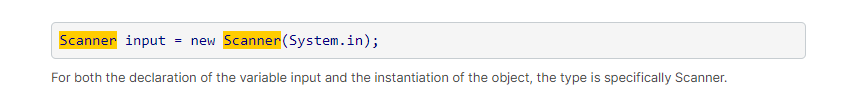

- But In the context of inheritance, we’ve seen it in the ability of an object to be referred to by a variable with a type that is a superclass of the actual class from which the object is instantiated. Similarly, with interfaces, we’ve seen that an object can be referred to by an interface-typed variable as long as the object’s class (or an ancestor) implements the interface. 

> In this section you'll learn the differences between how that processing is handled at both compile time and runtime.

**Example 1: -- Polymorphism related to Inheritance**
> i.e. left hand side Declaration ("Canine [] groomer" below) is superclass type, right hand side Instantiation is child class type. ("New Wolf(xxx)", "New Poodle(xxx)" below)

- The class "GroomEverything" creates an array of Canine type. (see "Canine[]" in screenshot below)
    - Notice that the array is declared as a Canine array. With that, we can insert objects that are canines.
    - Since Canine is abstract, that means any object of its concrete subclasses (e.g. "Poodle" and "Wolf" class below) can be inserted.
    
> Note: Even though we learned that the elements of an array must be of the same type or the array won't compile, there's some flexibility in that rule due in part to inheritance. (like above example)


- Regardless of what's in the array, the operations that we can directly invoke on the elements using their references are dictated by the array's type, not its element's type
    - This means each element (e.g. New Wolf(xxx) instance) in the "groomer" array can only invoke the method under "Canine" method, not its class's specific method (e.g. Wolf, Poodle's method), in a syntax wise level.
    - Please refer to this bullet points in notes below for details: "Why "Canine" object can have .groom() method (I did not see "groom" method being defined under Canine object code above)?"
- But after method is invoked, the object (element in array) will, however, perform its specific class' implementation of that method. (e.g. New Wolf instance will perform Wolf's groom() method, New Poodle instance will perform Poodle's groom() method)

> In this case, we have a loop that iterates through each Canine reference in the array and calls the groom method on a given object.


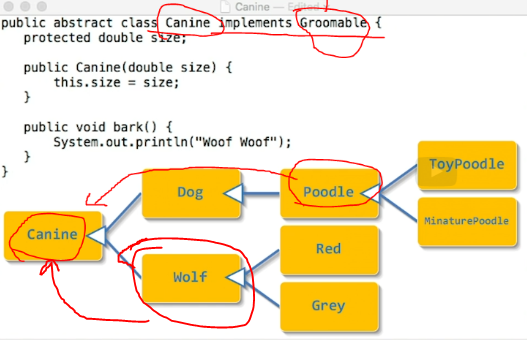
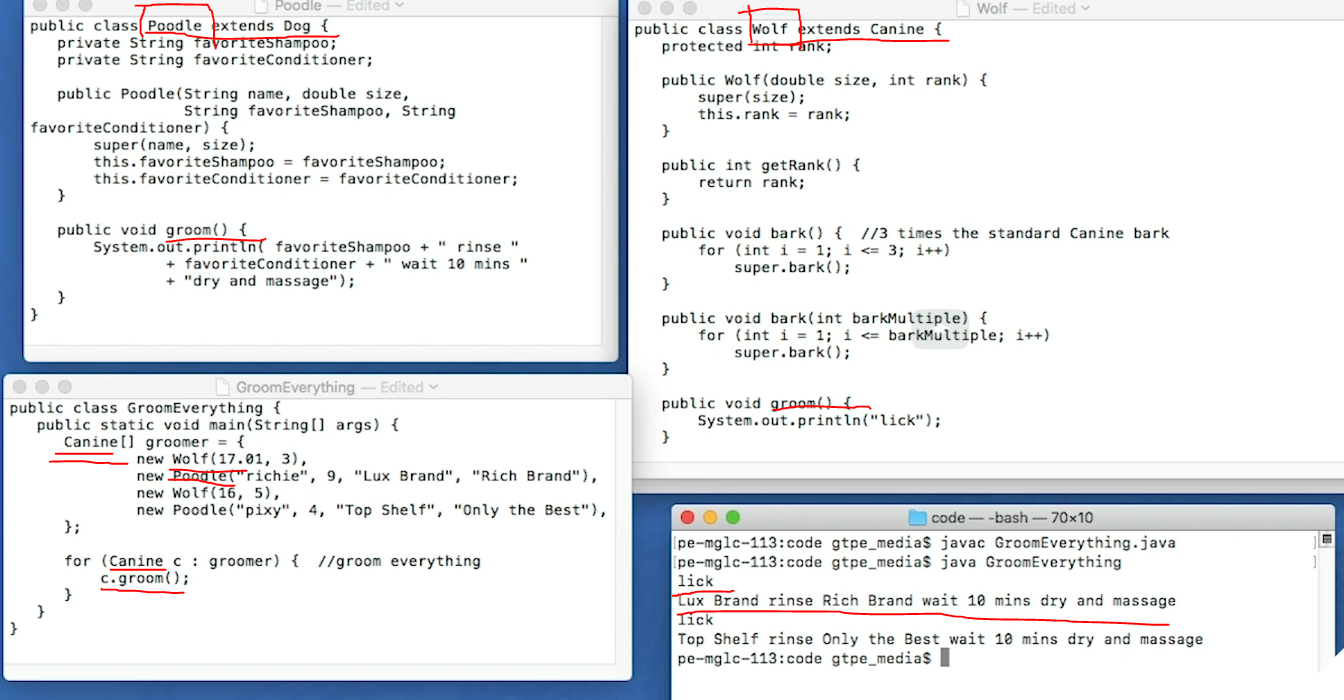

- **Why "Canine" object can have .groom() method** (I did not see "groom" method being defined under Canine object code above)? -> I guess it is because Canine is **abstract** class which delegates the interface method to its child class (concrete class). 
    - If not using interface, but just using inheritance (see Module_5_L12_Inheritance notes section 8: "Abstract" modifier), then there will be an abstract method "groom()" being declared under "Canine" abstract class.
    - But since we are using interface, such abstract method header can be omitted based on interface syntax, as long as it delegated such method to its child (e.g. "Poodle" and "Wolf" above). (see Module_6_L13_Interfaces_and_Algorithms notes -> section 1 "Interface" -> bullet point "Abstract class does not need to define/complete methods from interface xxx")
    - Therefore, it is syntax wise correct if we use groom method for Canine object.

**Example 2: -- Polymorphism related to Interface**
> i.e. left hand side Declaration ("Groomable [] groomer" below) is interface type, right hand side Instantiation is type of specific class that implemented the interface. ("New Wolf(xxx)", "New Poodle(xxx)", "New Car(xxx)" below)

- Similar to above, the difference is that we changed "Canine" to "Groomable" for array declaration under "GroomEverything" class. 
    - Because now we have "Car" class which does not have inheritance (superclass/childclass) relationship with any of the "Poodle" or "Wolf" class
    - Therefore, we have to use more common type that applies to all three classes, which is the "Interface" type "Groomable" (note: Groomable class was not shown in the screenshot below, but you get the idea - all three classes has "implements  Groomable" shown below)
    
    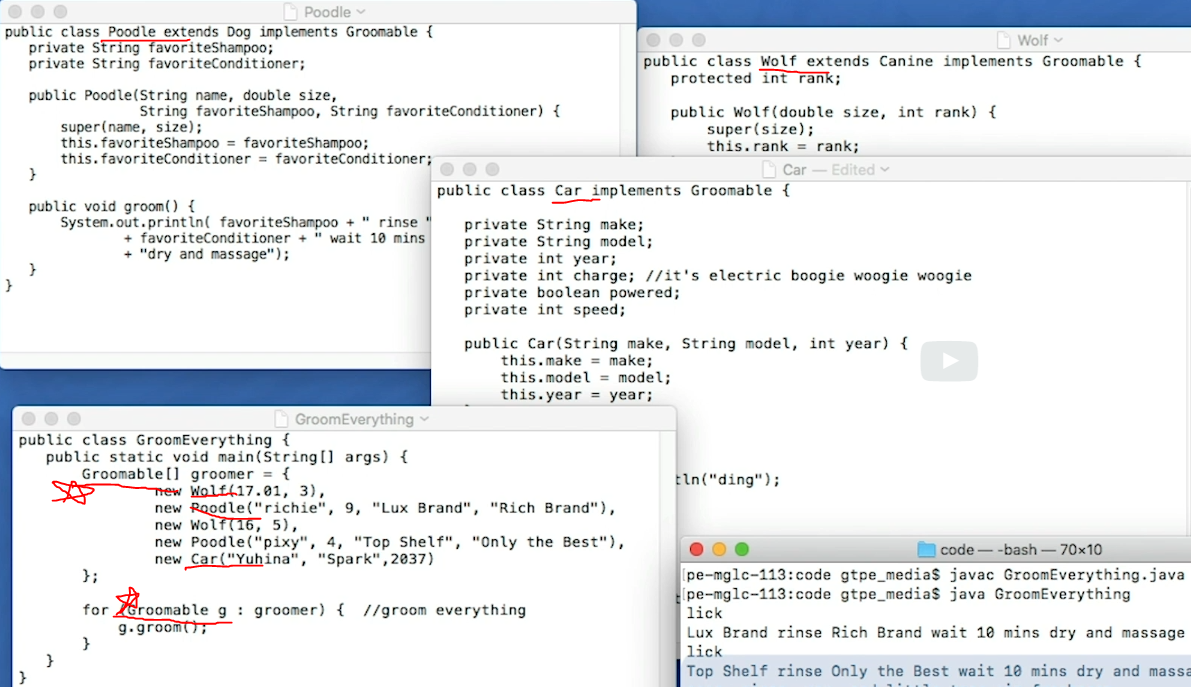


## 2. Declared Type vs. Object Type

We will give the different types in declaration vs. instantiation a formal name:

In the screenshot below:
- "Canine" is the **declared type** of pixy variable;
- "Poodle" is the **object type** of pixy variable.
> Generally speaking, the object type is the actual class that follows the "new" operator when an object is instantiated.

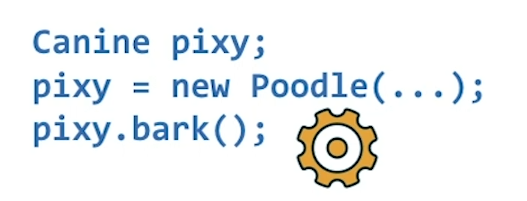


VIP!!!!!!
In the screenshot below:
- "Canine" is still the **declared type** of pixy variable;
- "Poodle" is the **object type** that pixy points to.

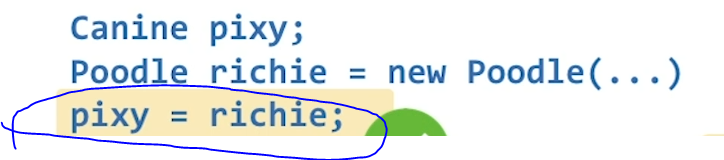

## 3. What Compiler Checks for the legality of Polymorphism 

- Check 1. Can object of some class (object type) be legally assigned to a reference of some declared type?
    - If the declared type is a class then Compiler checks whether the object type is the same class or a subclass of the declared type. (Compiler uses Java's "is a" relationship test)
    - If the declared type is an interface (e.g. Groomable type), then Compiler will check to see whether the object type or any of its ancestors implement the interface. (Compiler also uses Java's "is a" relationship test)
- Check 2. Is every **variable and method** we try to access with a reference variable (object type's class) **available in its declared type**?
    - And by available, we mean the method/variable is either declared, or defined in that type.
- If the answer is no, then a compiler error occurs.

Please note: (**Implicit Assignment**)
- "Check 1" above also happens when we invoke **methods** that accept objects as input (i.e. formal parameters)
    - There's an **implicit assignment** of the actual parameter to the formal parameter
    - Object Type in this context is the type of object that actual parameter points to
    - Declared Type in this context is the type of what formal parameter is declared as.
    - Example:
        - playFetch method's declare type is "Dog" as seen in "(Dog myPet)"
        - playFetch method's object type is "Dog" when input is richie, because richie was declared as "Dog"
        - playFetch method's object type is "Poodle" when input is pixy, because pixy was declared as "Poodle"
    - And same as above checking, compiler checks if object type is the same class or a subclass of the declared type
        - In the example below, when input is pixy, since "Poodle" is a subclass of "Dog", it will work and output should be the same as when input is richie.
    
    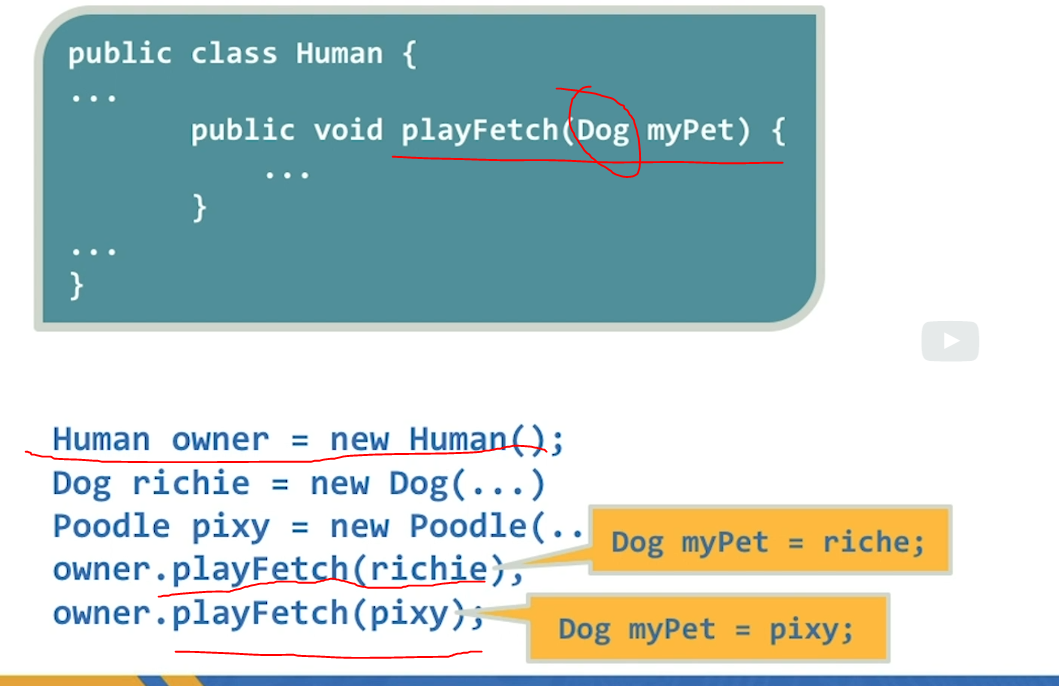
    
    
    ==================
    
    
    - Same logic applies for array type as well: (below example will also pass the compiler check)
    
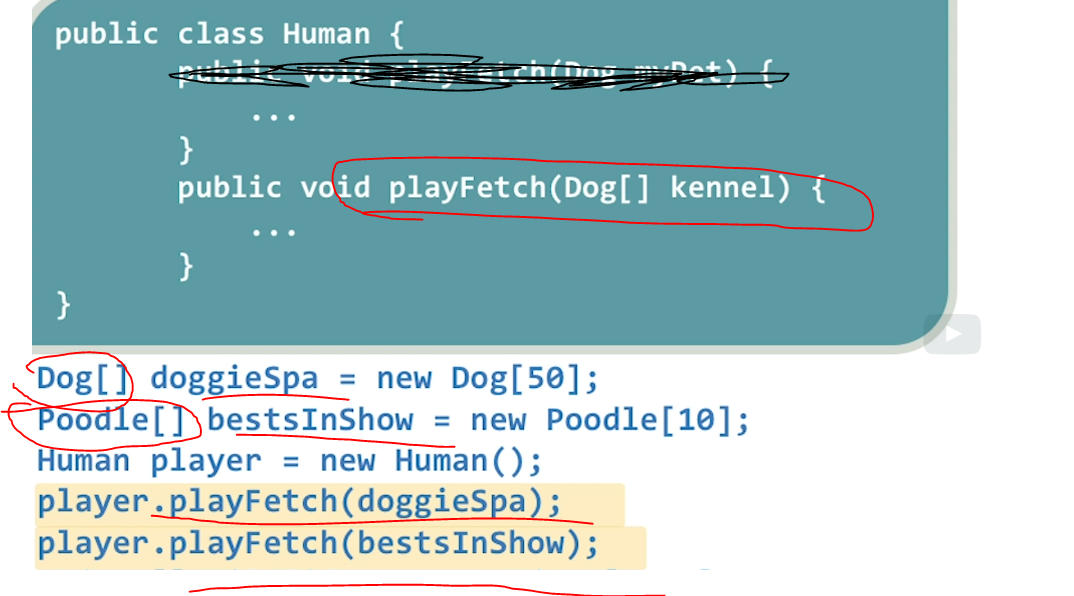

Example for "Check 2":

- The below example will work because "bark" method was defined in Canine class and pixy has "Canine" as declare type (i.e. "bark" method is available in pixy's declare type)
    - please refer to: "Declared Type vs. Object Type" section above -- pixy still holds "Canine" as its **declare type** even after richie was assigned to it.
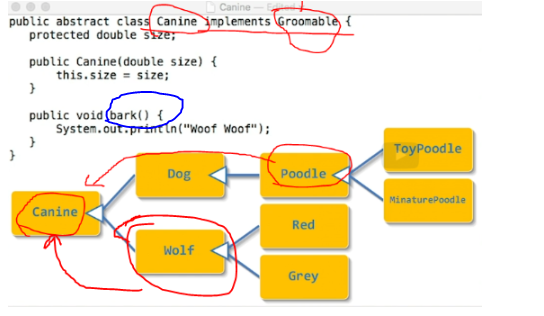

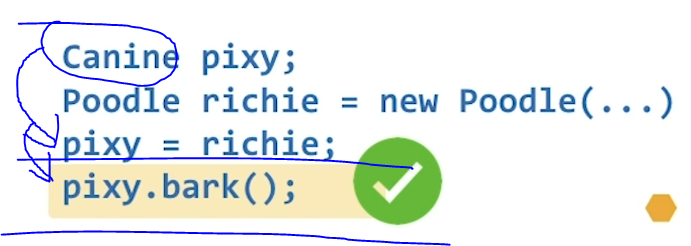

- The below example won't work (assuming enterDogShow() method is only declared/defined in Poodle class, not in Canine class)
    - To solve this issue, we have to use casting to cast pixel variable to "Poodle" class before invoking that enterDogShow() method. (we have seen casting being used for the same purpose in some previous lecture notes)

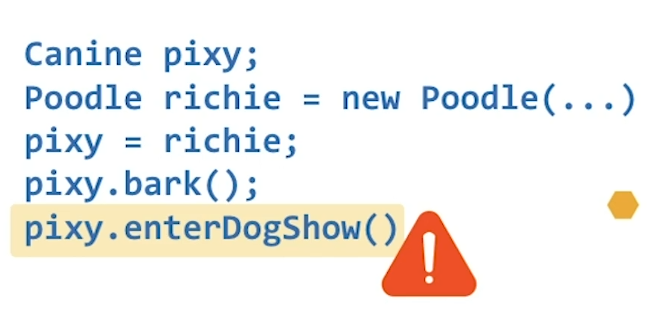

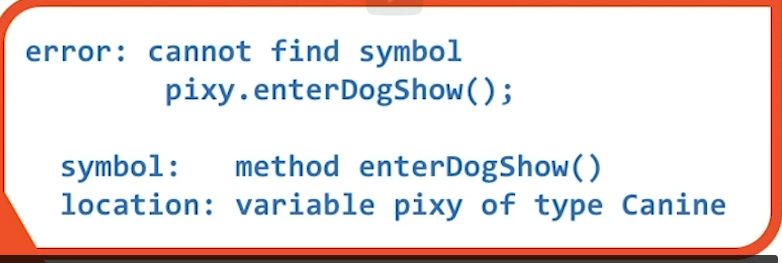




### 3.1. Casting (to solve compiler check 2 issue)

- In this example, we cast pixy to Poodle class (please note: casting does not change pixy variable's type, it just created another object that has Poodle type after casting)
- After that, the check 2 in above section will pass the compiler check **(NOTE: Such casting will only pass the compiler check, whether or not it will pass the runtime check will be indicated in later section below)**

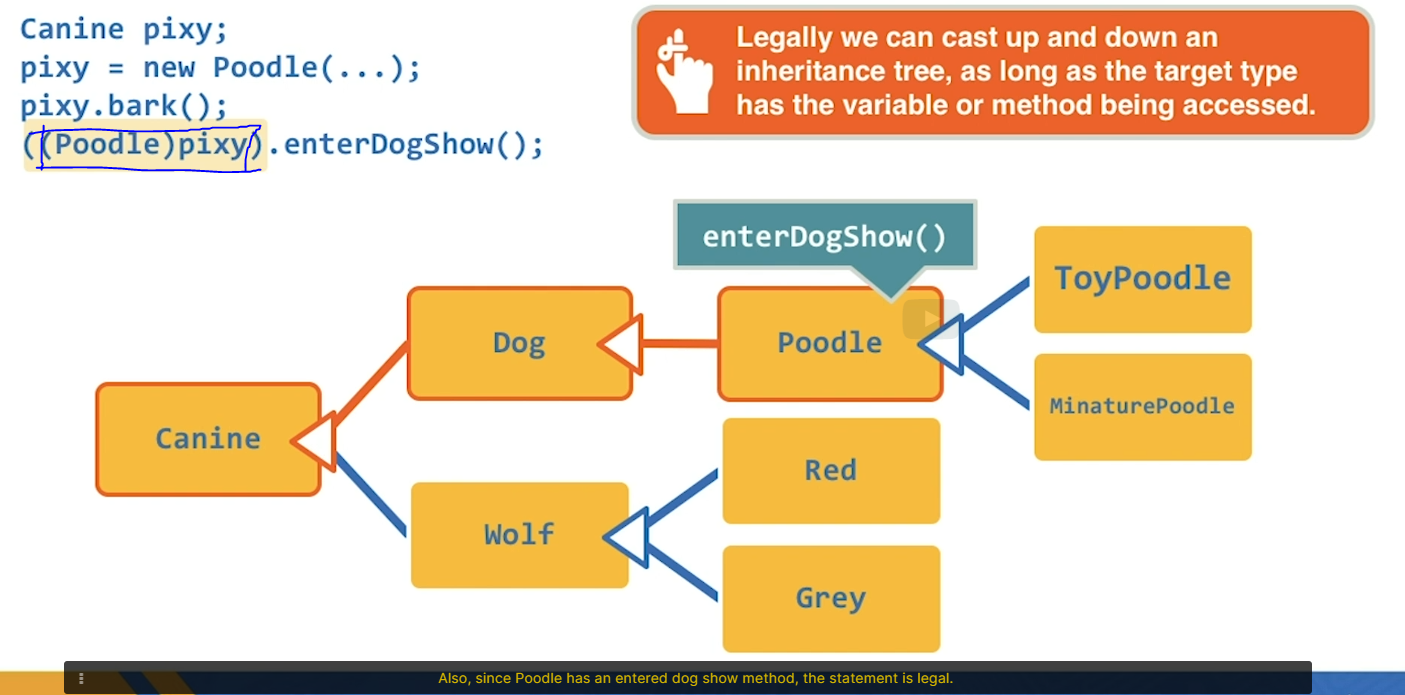



### 3.2. When there is Method Overriding

- In this example, after running the code, Student's isHealthy() will be executed and Person's talk() will be executed.

    - variable s has declare type of Person, and object type of Student.
    - Compiler will pass both check 1 and check 2. Because: 1. object type Student is subclass of Person; 2. declare type Person has both methods talk() and isHealthy() in "Person" class.
    - However, for "isHealthy()" method, since there is method overriding in "Student" class as well, therefore the "Student" class's isHealthy() will be executed rather than "Person" class's isHealthy().
    - This alignes with interface example in "Definition" section -> "Example 1" -> bullet point "But after method is invoked, the object (element in array) will, however, perform its specific class' implementation of that method. "
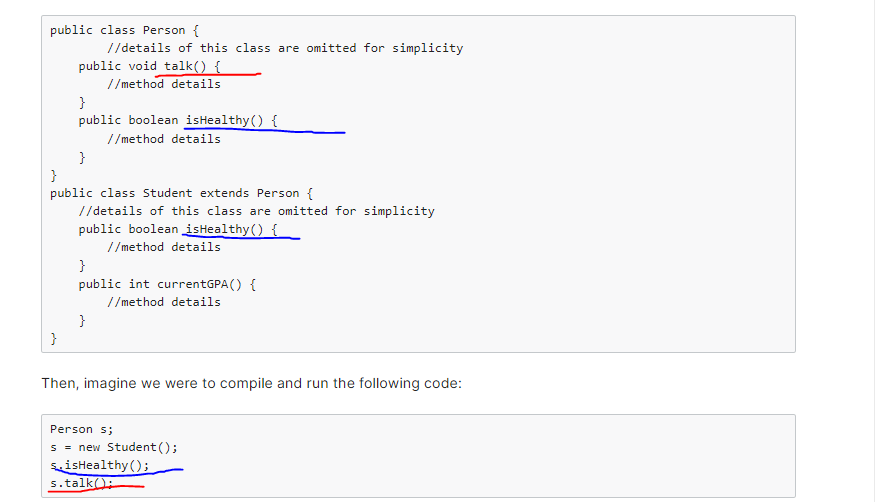

**dynamic binding, late-binding, or runtime resolution**
- When there is no method overriding, e.g. "s.talk()" example and "pixy.bark()" example above, where method is only defined at declared type class (superclass or interface), not object type class (subclass):
    - Then declared type class's method will be executed, even if the object type is another type.
    - What happens at backend at runtime is that: JVM (Java VM) would check up the inheritance tree, level by level until it finds a superclass with a such method definition.
        - e.g. Java find there is no .talk() in Student() class (object class), then it level up to "Person" class, and find if there is .talk() method.
    - This process of matching a method call in a statement to its actual definition **at runtime (instead of compile time)** is known by either of these three terms: **dynamic binding, late-binding, or runtime resolution**.

## 4. What Runtime Checks for the legality of Polymorphism

- As what's noted under section "3.1. Casting", such casting (downcasting) method will only pass the compiler check, whether or not it will also pass runtime check will depending on the actual "object type" of the variable being casted.


- Reason: when downcasting, JVM will ask: is the "object type" necessarily belongs to the class that it will be casted to?


- In this example below, it will pass runtime check: 
    - "object type" of pixy is Poodle (although its declare type is Canine). 
    - Since variable pixy is casted to "Poodle" as well, and "Poodle" belongs to "Poodle", it passes.
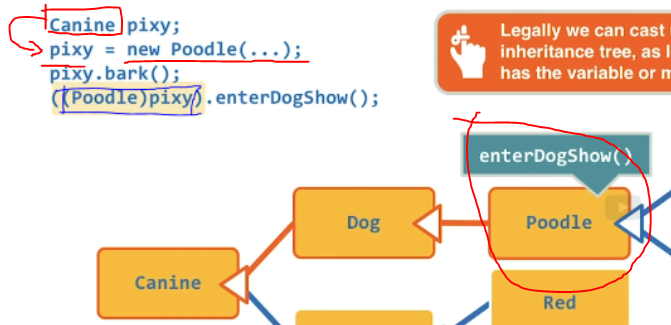



- In this example below, it won't pass runtime check (although it will pass compiler check because it has casting):
    - "object type" of dg is "Dog" (its declared type is also "Dog")
    - Variable dg is casted to "Poodle"
    - Since "Dog" (superclass) isn't necessarily a "Poodle" (subclass), i.e. "Dog" does not belong to "Poodle", the runtime error will occur related to casting.
    
    > Such runtime error is called **"ClassCastException" error**

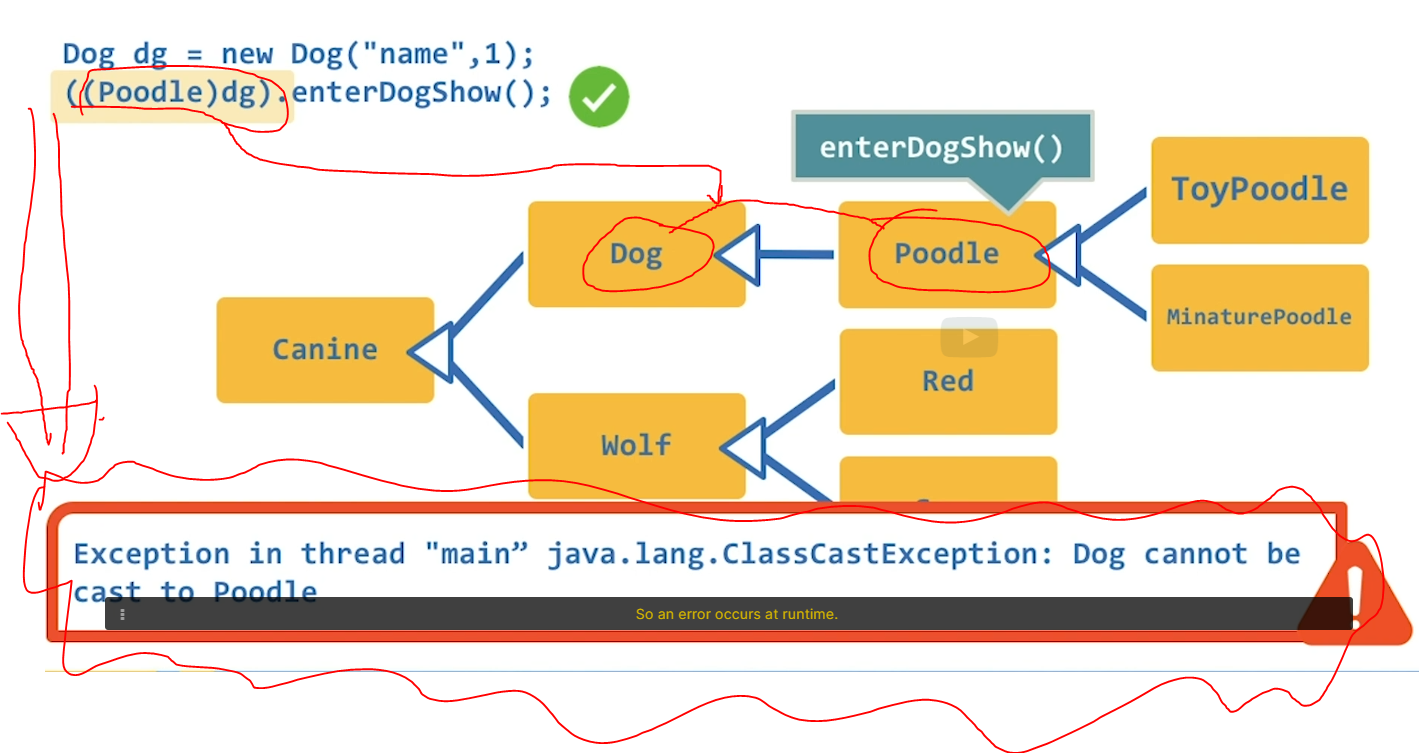



> Other good resources to explain this: https://stackoverflow.com/a/17178055



# Practice Question

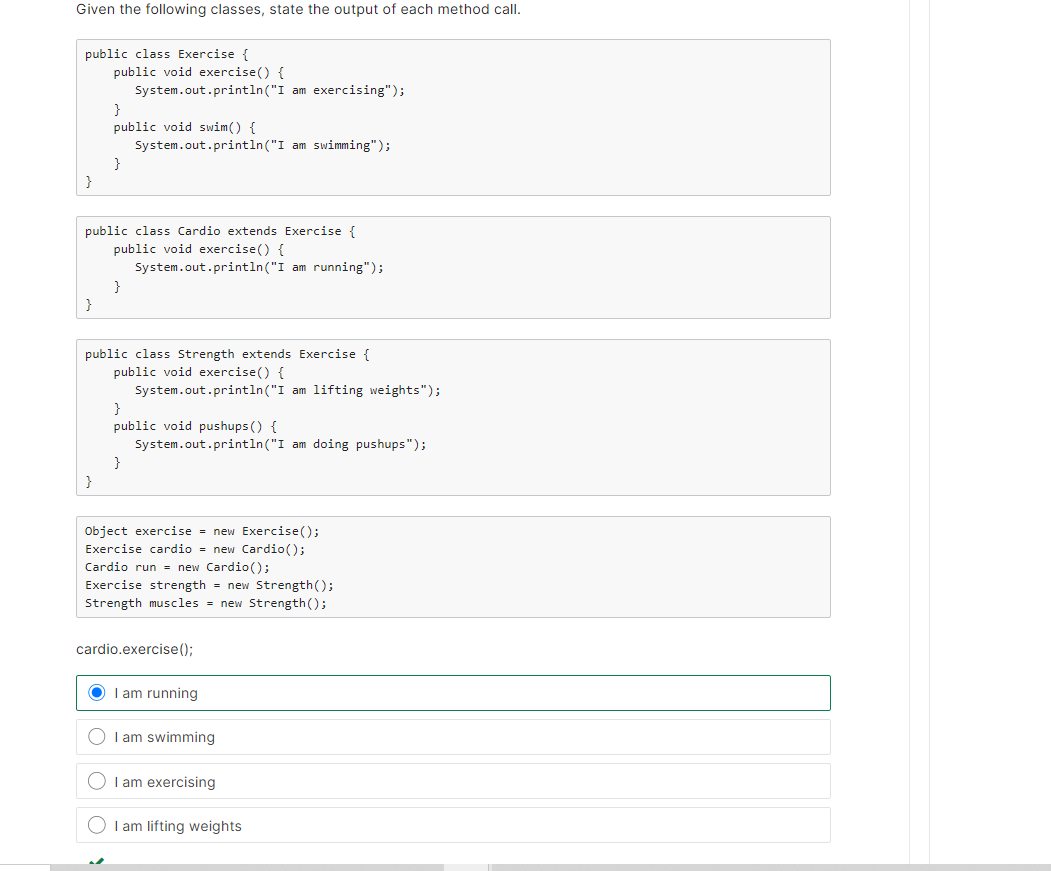
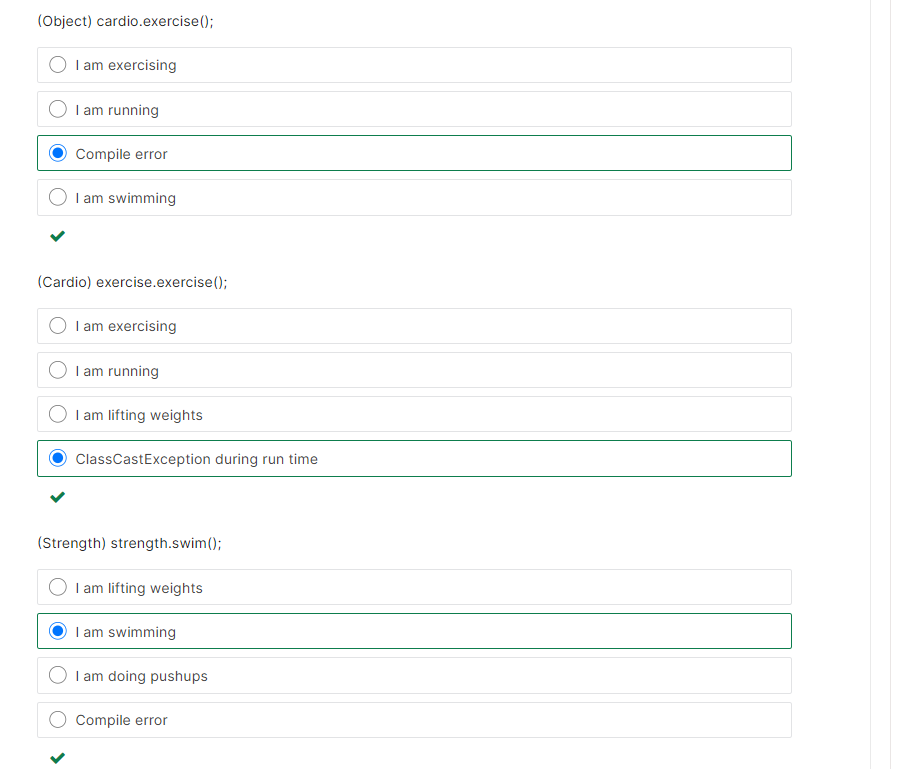